In [1]:
import pandas as pd
import numpy as np

In [4]:
import pymongo

DB_CONN_STRING = "mongodb://localhost:27017/"
DB_NAME = "poland-covid-vaccine-tweets"
COLLECTION_NAME = "tweets"

In [5]:
# import sys
# sys.path.append('/home/michal/dev/agh/eksploracja/project/poland-covid-vaccine/venv/lib/python3.8/site-packages')

In [6]:
mongo_client = pymongo.MongoClient(DB_CONN_STRING)
database_name = mongo_client[DB_NAME]
data_collection = database_name[COLLECTION_NAME]

In [7]:
tweets = [tweet for tweet in data_collection.find({})]

In [121]:
df = pd.DataFrame(tweets)
df["sentiment"] = pd.to_numeric(df["sentiment"])
df

,_id,url,date,content,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceUrl,sourceLabel,retweetedTweet,quotedTweet,mentionedUsers,covid_topic,sentiment,was_quotedTweet
0,1366147063893925898,https://twitter.com/zybstar/status/13661470638...,2021-02-28T22:03:36+00:00,@tomaszbryjow Znajoma nauczycielka też ciężko ...,1307288990664531969,1,0,2,0,1366121799935746049,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,[1257244746256441344],True,-0.5,NaN
1,1366091029452062726,https://twitter.com/GarciaRiesling/status/1366...,2021-02-28T18:20:56+00:00,BRD 🇩🇪🇩🇪 Corona - Witz \n\nPlan: zmniejszyć sc...,1299023069021908992,4,4,8,0,1366091029452062726,pl,http://twitter.com/#!/download/ipad,Twitter for iPad,None,NaN,"[3222588577, 8894972, 719190351974703104, 7898...",True,0.0,NaN
2,1366108573688856579,https://twitter.com/sta_____pawel/status/13661...,2021-02-28T19:30:39+00:00,@szejnfeld Dlaczego ta szczepionka wywołuje ta...,4107565035,0,0,1,0,1366046249653325824,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,[535452316],True,0.0,NaN
3,1366085125117730818,https://twitter.com/kejtrouge/status/136608512...,2021-02-28T17:57:29+00:00,"@sylvcz Pamietajmy, że jak ruszyły szczepienia...",1003546310,1,2,11,1,1366084298168819712,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,[101564798],True,1.5,NaN
4,1366115738101157895,https://twitter.com/Lev_Lachim/status/13661157...,2021-02-28T19:59:07+00:00,@napalonywikary Dlaczego AstraZeneca drastyczn...,1255502249759059968,1,0,0,0,1366102520146329600,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,[479373693],True,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323531,1353067165990051854,https://twitter.com/gfkot/status/1353067165990...,2021-01-23T19:48:45+00:00,"Hej @FaktyTVN, ogarnijcie się! Podana liczba, ...",1363264568,2,4,11,1,1353067165990051854,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,[1901341021],NaN,-1.0,True
323532,1386955823700709378,https://twitter.com/olimpia_szuwar/status/1386...,2021-04-27T08:10:11+00:00,"Francuski ""wizjoner"" Jacques Attali w 2006 r.....",820209598250553344,10,97,178,14,1386955823700709378,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,None,NaN,0.0,True
323533,1387390743296319492,https://twitter.com/PolsatNewsPL/status/138739...,2021-04-28T12:58:24+00:00,74-latka z Namysłowa w pandemii leczyła się wy...,2383788666,43,42,80,24,1387390743296319492,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,None,NaN,0.0,True
323534,1386046424853499905,https://twitter.com/KrocpokZboj/status/1386046...,2021-04-24T19:56:33+00:00,"Poznajcie moi drodzy, to żona Morawieckiego - ...",3319251839,39,50,372,9,1386046424853499905,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,None,NaN,0.5,True


In [142]:
df.date = pd.to_datetime(df.date)

In [10]:
minimal = df.loc[df.groupby('conversationId')['date'].idxmin()]
minimal = minimal.loc[minimal['_id'] == minimal['conversationId']][['_id', 'conversationId', 'sentiment', 'date']]
minimal = minimal.rename(columns={'date': 'minimalDate', '_id': 'minimalId'})

In [11]:
minimal

,minimalId,conversationId,sentiment,minimalDate
320832,382608319577587712,382608319577587712,-1.0,2013-09-24 20:51:46+00:00
320382,459013710284353536,459013710284353536,0.0,2014-04-23 16:59:31+00:00
321883,552799382094241792,552799382094241792,0.0,2015-01-07 12:10:17+00:00
321242,716240087399403520,716240087399403520,0.5,2016-04-02 12:25:18+00:00
315803,905049080002424833,905049080002424833,-0.5,2017-09-05 12:44:50+00:00
...,...,...,...,...
203988,1388272691564716032,1388272691564716032,0.5,2021-04-30 23:22:57+00:00
138455,1388275896210149383,1388275896210149383,2.0,2021-04-30 23:35:41+00:00
138451,1388277674464976897,1388277674464976897,1.0,2021-04-30 23:42:45+00:00
244561,1388278250078617611,1388278250078617611,0.0,2021-04-30 23:45:02+00:00


In [12]:
maximal = df.loc[df.groupby('conversationId')['date'].idxmax()]
maximal = maximal[['conversationId', 'date']].rename(columns={'date': 'maximalDate'})

In [13]:
maximal

,conversationId,maximalDate
163447,11788902058,2021-04-05 06:30:34+00:00
320832,382608319577587712,2013-09-24 20:51:46+00:00
320382,459013710284353536,2014-04-23 16:59:31+00:00
321883,552799382094241792,2015-01-07 12:10:17+00:00
321242,716240087399403520,2016-04-02 12:25:18+00:00
...,...,...
128772,1388273467997499394,2021-04-30 23:36:56+00:00
138455,1388275896210149383,2021-04-30 23:35:41+00:00
138451,1388277674464976897,2021-04-30 23:42:45+00:00
244561,1388278250078617611,2021-04-30 23:45:02+00:00


In [14]:
merged = pd.merge(minimal, maximal, on='conversationId')

In [15]:
merged['dateDiff'] = merged['maximalDate'] - merged['minimalDate']

In [16]:
merged.sort_values(by=['dateDiff'], ascending=False)

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff
5,989841396633829376,989841396633829376,-2.0,2018-04-27 12:19:13+00:00,2021-03-21 14:44:01+00:00,1059 days 02:24:48
12,1238508622591725568,1238508622591725568,1.5,2020-03-13 16:54:00+00:00,2021-04-28 21:25:49+00:00,411 days 04:31:49
52,1329523471530008610,1329523471530008610,0.0,2020-11-19 20:34:31+00:00,2021-04-28 20:38:59+00:00,160 days 00:04:28
688,1356252057766940672,1356252057766940672,2.0,2021-02-01 14:44:23+00:00,2021-05-09 16:39:18+00:00,97 days 01:54:55
86,1346166730150846464,1346166730150846464,1.0,2021-01-04 18:48:53+00:00,2021-03-30 18:38:57+00:00,84 days 23:50:04
...,...,...,...,...,...,...
32893,1372445670582452225,1372445670582452225,0.0,2021-03-18 07:12:01+00:00,2021-03-18 07:12:01+00:00,0 days 00:00:00
32891,1372445180461260802,1372445180461260802,1.5,2021-03-18 07:10:04+00:00,2021-03-18 07:10:04+00:00,0 days 00:00:00
32890,1372444996855549953,1372444996855549953,0.5,2021-03-18 07:09:20+00:00,2021-03-18 07:09:20+00:00,0 days 00:00:00
32889,1372444933655818240,1372444933655818240,0.0,2021-03-18 07:09:05+00:00,2021-03-18 07:09:05+00:00,0 days 00:00:00


In [33]:
bins = [
    pd.Timedelta("nan"),
    pd.Timedelta(minutes = 1),
    pd.Timedelta(minutes = 60),
    pd.Timedelta(days = 1),
    pd.Timedelta(days = 2),
    pd.Timedelta(days = 3),
    pd.Timedelta(days = 7),
    pd.Timedelta(days = 14),
    pd.Timedelta(days = 30),
    pd.Timedelta(weeks = 2000)
]
labels = ['0-1 min', '1-60 min', '60 min-1 day', '1-2 days', '2-3 days', '3-7 days', '7-14 days', 
          '14-30 days', '30+ days']

In [34]:
merged['bins'] = pd.cut(merged['dateDiff'], bins, labels = labels)

<AxesSubplot:title={'center':'Zywotność tweetów z pozytywnym sentymentem (powyżej 0.5)'}, xlabel='bins'>

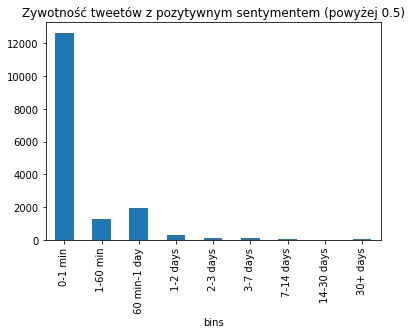

In [87]:
positive_grouped = merged[merged['sentiment'] > 0.5].groupby('bins').count()
positive_grouped.reset_index().plot.bar(x='bins', y='minimalId', title = "Zywotność tweetów z pozytywnym sentymentem (powyżej 0.5)", legend = False)

<AxesSubplot:title={'center':'Zywotność tweetów z negatywnym sentymentem (poniżej -0.5)'}, xlabel='bins'>

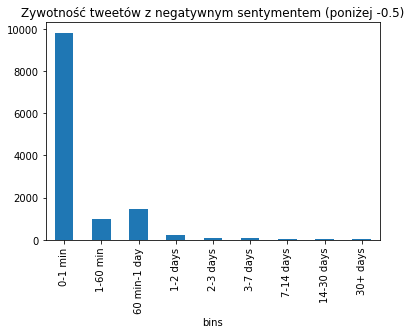

In [96]:
positive_grouped = merged[merged['sentiment'] < -0.5].groupby('bins').count()
positive_grouped.reset_index().plot.bar(x='bins', y='minimalId', title = "Zywotność tweetów z negatywnym sentymentem (poniżej -0.5)", legend = False)

<AxesSubplot:title={'center':'Zywotność tweetów z neutralnym sentymentem'}, xlabel='bins'>

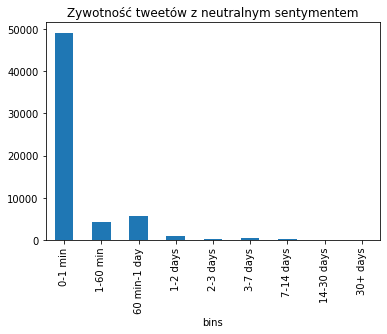

In [95]:
positive_grouped = merged[(merged['sentiment'] >= -0.5) & (merged['sentiment'] <= 0.5)].groupby('bins').count()
positive_grouped.reset_index().plot.bar(x='bins', y='minimalId', title = "Zywotność tweetów z neutralnym sentymentem", legend = False)

In [36]:
grouped = merged.groupby('bins').count()
grouped

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff,sentimentHigh,secondsOfLife
bins,,,,,,,,
0-1 min,71700,71700,71700,71700,71700,71700,71700,71700
1-60 min,6512,6512,6512,6512,6512,6512,6512,6512
60 min-1 day,9121,9121,9121,9121,9121,9121,9121,9121
1-2 days,1292,1292,1292,1292,1292,1292,1292,1292
2-3 days,400,400,400,400,400,400,400,400
3-7 days,553,553,553,553,553,553,553,553
7-14 days,168,168,168,168,168,168,168,168
14-30 days,61,61,61,61,61,61,61,61
30+ days,47,47,47,47,47,47,47,47


In [110]:
merged[(merged['sentiment'] >= -0.5) & (merged['sentiment'] <= 0.5)].sort_values("dateDiff", ascending=False)

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff,bins,sentimentHigh,secondsOfLife
52,1329523471530008610,1329523471530008610,0.0,2020-11-19 20:34:31+00:00,2021-04-28 20:38:59+00:00,160 days 00:04:28,30+ days,False,13824268.0
1803,1356642659771830276,1356642659771830276,0.5,2021-02-02 16:36:29+00:00,2021-04-20 14:54:42+00:00,76 days 22:18:13,30+ days,False,6646693.0
76,1344408341548822535,1344408341548822535,0.0,2020-12-30 22:21:41+00:00,2021-03-17 20:10:54+00:00,76 days 21:49:13,30+ days,False,6644953.0
71,1343605641710022667,1343605641710022667,0.0,2020-12-28 17:12:02+00:00,2021-03-09 08:24:04+00:00,70 days 15:12:02,30+ days,False,6102722.0
9011,1360634926790545412,1360634926790545412,0.0,2021-02-13 17:00:20+00:00,2021-04-18 19:25:41+00:00,64 days 02:25:21,30+ days,False,5538321.0
...,...,...,...,...,...,...,...,...,...
32554,1372251311232667648,1372251311232667648,0.0,2021-03-17 18:19:42+00:00,2021-03-17 18:19:42+00:00,0 days 00:00:00,0-1 min,False,0.0
32556,1372251855464595456,1372251855464595456,0.0,2021-03-17 18:21:52+00:00,2021-03-17 18:21:52+00:00,0 days 00:00:00,0-1 min,False,0.0
32559,1372251998486212612,1372251998486212612,0.5,2021-03-17 18:22:26+00:00,2021-03-17 18:22:26+00:00,0 days 00:00:00,0-1 min,False,0.0
32561,1372252282247602188,1372252282247602188,-0.5,2021-03-17 18:23:33+00:00,2021-03-17 18:23:33+00:00,0 days 00:00:00,0-1 min,True,0.0


<AxesSubplot:xlabel='bins'>

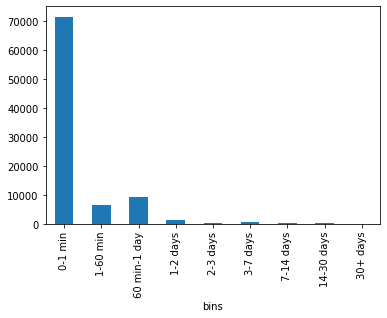

In [81]:
grouped.reset_index().plot.bar(x='bins', y='minimalId', legend = False)

In [47]:
merged["sentiment"] = pd.to_numeric(merged["sentiment"])

In [46]:
grouped_xd = merged.groupby('dateDiff').agg( {'sentiment':['mean','std']}).reset_index()
# grouped_xd.filter()

<AxesSubplot:title={'center':'Średni sentyment względem czasu życia tweeta'}, xlabel='bins'>

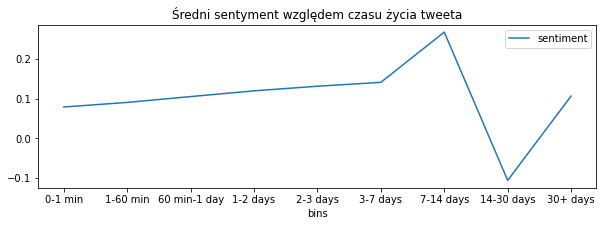

In [69]:
merged.groupby('bins').sentiment.mean().reset_index().plot(x='bins', y ='sentiment', figsize=(10,3), title='Średni sentyment względem czasu życia tweeta')

<AxesSubplot:>

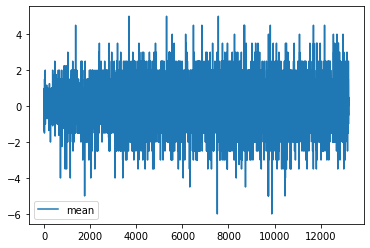

In [70]:
grouped_xd.loc[grouped_xd['dateDiff'] < pd.Timedelta(weeks = 1)]['sentiment'].plot(y='mean')

In [28]:
merged['sentimentHigh'] = merged['sentiment'] < 0

<AxesSubplot:xlabel='sentiment is high', ylabel='count'>

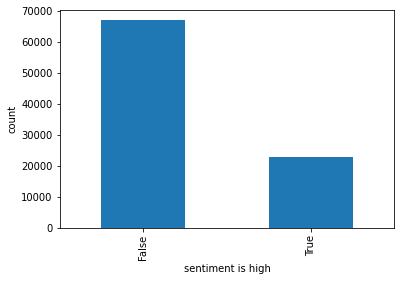

In [29]:
merged.groupby('sentimentHigh').count().reset_index().plot.bar(x='sentimentHigh', y='minimalId', xlabel='sentiment is high', ylabel = 'count', legend = False)

In [30]:
merged['secondsOfLife'] = merged['dateDiff'].dt.total_seconds()

In [31]:
grouped_by_sentiment = merged.groupby('sentiment').agg( {'secondsOfLife':['mean','std']})

<AxesSubplot:title={'center':'Średni czas życia w sekundach'}, xlabel='sentiment'>

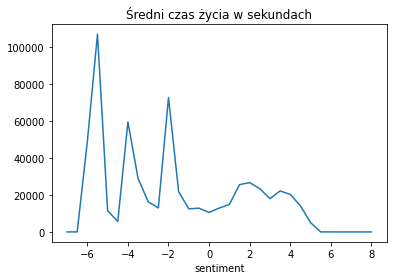

In [73]:
grouped_by_sentiment.secondsOfLife.plot(y = "mean", legend = False,title = "Średni czas życia w sekundach")

# Użytkownicy

In [122]:
grouped_sentiment = df.groupby('user')['sentiment'].sum().reset_index()

In [128]:
grouped_sentiment.sort_values('sentiment').tail(10)

,user,sentiment
24268,864554093825675265,122.5
4619,358136787,124.0
1289,57626153,132.5
33120,1156144667756519424,142.0
2954,180822352,142.0
20836,735098239964352512,142.5
4870,381383589,160.0
6725,562800078,161.5
12251,2239021813,201.5
43899,1346846950080081920,4301.0


# new covid cases

In [199]:
covid_cases = pd.read_csv('full_data.csv')
covid_cases_poland = covid_cases[covid_cases['location'] == 'Poland']
covid_cases_poland.date = pd.to_datetime(covid_cases_poland.date)
covid_cases_poland = covid_cases_poland[covid_cases_poland['date'] >= '2021-02-01']

/home/michal/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='date'>

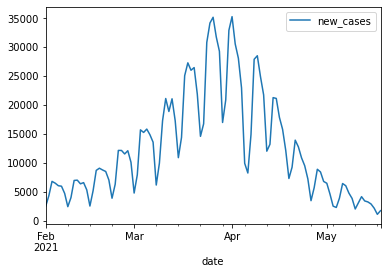

In [200]:
covid_cases_poland.plot(x = 'date',y='new_cases')

In [190]:
df_to_compae_cases = df[['date', 'sentiment']]
df_to_compae_cases.date = pd.to_datetime(df_to_compae_cases.date)
df_to_compae_cases.date = df_to_compae_cases.date.dt.date
df_to_compae_cases.date = pd.to_datetime(df_to_compae_cases.date)
df_to_compae_cases = df_to_compae_cases[df_to_compae_cases['date'] >= '2021-02-01']

<AxesSubplot:>

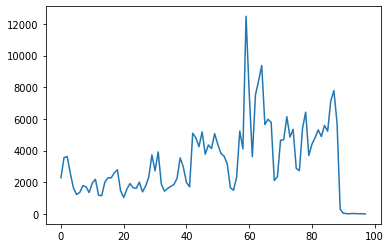

In [194]:
df_to_compae_cases.groupby('date').count().reset_index().sort_values('date').plot(y='sentiment', legend = False)

In [219]:
grouped_to_compare = df_to_compae_cases.groupby('date').size().reset_index(name='countsOfTweets')

In [220]:
grouped_to_compare

,date,countsOfTweets
0,2021-02-01,2284
1,2021-02-02,3561
2,2021-02-03,3628
3,2021-02-04,2566
4,2021-02-05,1636
...,...,...
93,2021-05-05,31
94,2021-05-06,22
95,2021-05-07,10
96,2021-05-08,15


In [221]:
covid_cases_poland

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
62482,2021-02-01,Poland,2504.0,42.0,1515889.0,37222.0,37770.0,1821.0,76975.0,3815.0
62483,2021-02-02,Poland,4326.0,254.0,1520215.0,37476.0,37493.0,1811.0,76411.0,3778.0
62484,2021-02-03,Poland,6801.0,421.0,1527016.0,37897.0,37504.0,1843.0,76269.0,3756.0
62485,2021-02-04,Poland,6495.0,447.0,1533511.0,38344.0,36846.0,1901.0,75756.0,3783.0
62486,2021-02-05,Poland,6053.0,368.0,1539564.0,38712.0,36754.0,1932.0,75116.0,3804.0
...,...,...,...,...,...,...,...,...,...,...
62584,2021-05-14,Poland,3252.0,290.0,2849014.0,71311.0,24589.0,1866.0,56872.0,3809.0
62585,2021-05-15,Poland,2897.0,298.0,2851911.0,71609.0,22715.0,1743.0,53294.0,3685.0
62586,2021-05-16,Poland,2168.0,55.0,2854079.0,71664.0,21027.0,1652.0,50846.0,3596.0
62587,2021-05-17,Poland,1111.0,11.0,2855190.0,71675.0,20107.0,1641.0,49434.0,3570.0


In [223]:
tweets_amd_cases = grouped_to_compare.merge(covid_cases_poland, on = 'date')

<AxesSubplot:xlabel='date'>

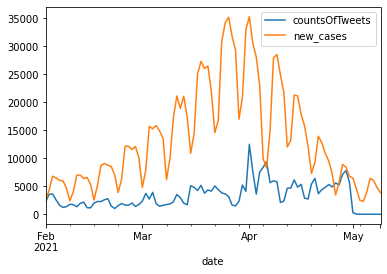

In [226]:
tweets_amd_cases.plot(x = 'date', y=['countsOfTweets', 'new_cases'])